In [1]:
#Loading the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
#Loading the necessary document on the jupyter notebook for analysis

df = pd.read_excel('C:/Users/ADMIN/Desktop/BULKBOX WORK/prediction-model/Customer data(1).xlsx')

In [3]:
#Checking the overall shape of the data frame

df.shape  #22800 rows and 4 columns

(22800, 4)

In [4]:
# Checks the data types and helps identify the empty cells

df.info()

# Document date has 319 empty cells
# Customer name has 319 empty cells
# Item name has 321 empty cells
# Quantity has 319 empty cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Document Date         22481 non-null  datetime64[ns]
 1   Customer/Vendor Name  22481 non-null  object        
 2   Item Name             22479 non-null  object        
 3   Quantity              22481 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 712.6+ KB


Dropping the Empty Cells SHould have no effects on the overall data.

In [5]:
# Column names of the data set

df.columns

Index(['Document Date', 'Customer/Vendor Name', 'Item Name', 'Quantity'], dtype='object')

In [6]:
# .describe analyzez the columns of data types int or float.
# Explains the dispersion of the data.

df.describe()

,Quantity
count,22481.000000
mean,12.468422
std,334.618898
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,39493.950000


**CLEANING THE DATA**

In [7]:
# Identifying Missing Values

# df.isna()
df.isna().sum()

Document Date           319
Customer/Vendor Name    319
Item Name               321
Quantity                319
dtype: int64

In [8]:
# Handling the missing values by dropping them
# Making the drop permanent by using inplace=True

df.dropna(inplace=True)

In [9]:
# Confirming the Drop of missing cells

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22479 entries, 16 to 22799
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Document Date         22479 non-null  datetime64[ns]
 1   Customer/Vendor Name  22479 non-null  object        
 2   Item Name             22479 non-null  object        
 3   Quantity              22479 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 878.1+ KB


In [10]:
# Looking at the first 10 rows of the data

df.head(10)

,Document Date,Customer/Vendor Name,Item Name,Quantity
16,2023-05-16,BALLOON SAFARIS LTD,BIO YOGHURT STRAWBERRY 90ML X 12,2.0
17,2023-05-16,BALLOON SAFARIS LTD,BIO YOGHURT TROPICAL MIX 90ML X 12,2.0
18,2023-05-16,BALLOON SAFARIS LTD,BIO YOGHURT VANILLA 90ML X 12,2.0
19,2023-05-16,BALLOON SAFARIS LTD,BIO YOGHURT BERRYCOCKTAIL 90ML X 12,2.0
20,2023-05-16,BALLOON SAFARIS LTD,BIO YOGHURT PEACH 90ML X 12,2.0
21,2023-05-16,BALLOON SAFARIS LTD,MC WILD BUSH HONEY 20GX100,2.0
22,2023-01-04,BALLOON SAFARIS LTD,BIO YOGHURT VANILLA 90ML X 12,3.0
23,2023-01-04,BALLOON SAFARIS LTD,BIO YOGHURT STRAWBERRY 90ML X 12,3.0
24,2023-01-04,BALLOON SAFARIS LTD,BIO YOGHURT TROPICAL MIX 90ML X 12,2.0
25,2023-01-04,BALLOON SAFARIS LTD,BIO YOGHURT MANGO 90ML X 12,2.0


**GETTING THE DAYS OF THE WEEK WITH THE MOST ORDERS**

In [11]:
from datetime import datetime

In [12]:
#Converting the "Document Date" column to datetime format

df['Document Date'] = pd.to_datetime(df['Document Date'], dayfirst=True)

In [13]:
#Extracting the day of the week into a new column

df['Day of Week'] = df['Document Date'].dt.day_name()

In [14]:
df.head()

,Document Date,Customer/Vendor Name,Item Name,Quantity,Day of Week
16,2023-05-16,BALLOON SAFARIS LTD,BIO YOGHURT STRAWBERRY 90ML X 12,2.0,Tuesday
17,2023-05-16,BALLOON SAFARIS LTD,BIO YOGHURT TROPICAL MIX 90ML X 12,2.0,Tuesday
18,2023-05-16,BALLOON SAFARIS LTD,BIO YOGHURT VANILLA 90ML X 12,2.0,Tuesday
19,2023-05-16,BALLOON SAFARIS LTD,BIO YOGHURT BERRYCOCKTAIL 90ML X 12,2.0,Tuesday
20,2023-05-16,BALLOON SAFARIS LTD,BIO YOGHURT PEACH 90ML X 12,2.0,Tuesday


In [15]:
#Grouping the data by the day of the week and count the number of orders

daily_orders = df.groupby('Day of Week')['Quantity'].sum().reset_index()

In [16]:
#Sorting the results in descending order to find the days with the most orders

daily_orders = daily_orders.sort_values('Quantity', ascending=False)

In [17]:
#Retrieving the days with the highest number of orders

most_orders = daily_orders.loc[daily_orders['Quantity'] == daily_orders['Quantity'].max(), 'Day of Week']

In [18]:
print("Day with the most orders:", ', '.join(most_orders))

Day with the most orders: Friday


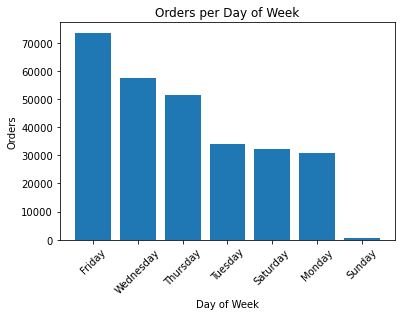

In [19]:
#Plotting the graph of the days per week and the orders

plt.bar(daily_orders['Day of Week'], daily_orders['Quantity'])
plt.xlabel('Day of Week')
plt.ylabel('Orders')
plt.title('Orders per Day of Week')
plt.xticks(rotation=45)
plt.show()


**TOP 3 PRODUCTS PER WEEK**

In [20]:
#Extracting the week number into a new column
#The dt.isocalendar().week is used to extract the week number from the date

df['Week Number'] = df['Document Date'].dt.isocalendar().week

In [21]:
df.tail()

,Document Date,Customer/Vendor Name,Item Name,Quantity,Day of Week,Week Number
22795,2023-04-20,SERENA NAIROBI,BIO YOGHURT MANGO 90ML X 12,5.0,Thursday,16
22796,2023-04-20,SERENA NAIROBI,BIO YOGHURT PEACH 90ML X 12,5.0,Thursday,16
22797,2023-02-21,SERENA NAIROBI,BIO YOGHURT NATURE-PLAIN 5 LITRES X 1,1.0,Tuesday,8
22798,2023-06-02,SERENA NAIROBI,BIO YOGHURT VANILLA 90ML X 12,1.0,Friday,22
22799,2023-05-11,SERENA NAIROBI,BIO YOGHURT NATURE- PLAIN 90ML X 12,15.0,Thursday,19


In [22]:
#Grouping the data by week number and product, and calculating the sum of the quantities

weekly_orders = df.groupby(['Week Number', 'Item Name'])['Quantity'].sum().reset_index()

In [23]:
#Sorting the data by week number and qauntity in descending order

weekly_orders =  weekly_orders.sort_values(['Week Number', 'Quantity'], ascending=[True, False])

In [24]:
#Creating a new data frame to store the top 3 products per week

top_products_per_week = pd.DataFrame(columns=['Week Number', 'Item Name', 'Quantity'])

In [25]:
top_products_per_week

,Week Number,Item Name,Quantity


In [26]:
#Iterating through each week and selecting the top 3 products

for week, week_data in weekly_orders.groupby('Week Number'):
    top_3_products = week_data.head(3)
    top_products_per_week = top_products_per_week.append(top_3_products)

In [27]:
top_products_per_week.head()

,Week Number,Item Name,Quantity
19,1,BIO FRESH WHOLE MILK 2000ML X 6,2732.0
25,1,BIO MOZARELLA CHEESE 1KGX1,519.0
14,1,BIO FRESH SEMI- SKIMMED MILK 20000ML X 1,350.0
86,2,BIO FRESH WHOLE MILK 2000ML X 6,2709.0
93,2,BIO MOZARELLA CHEESE 1KGX1,414.0


In [28]:
# pd.set_option('display.max_rows', 10000)

In [29]:
# Set the week_number as the index_column

top_products_per_week.set_index('Week Number', inplace=True)

In [30]:
top_products_per_week

,Item Name,Quantity
Week Number,,
1,BIO FRESH WHOLE MILK 2000ML X 6,2732.0
1,BIO MOZARELLA CHEESE 1KGX1,519.0
1,BIO FRESH SEMI- SKIMMED MILK 20000ML X 1,350.0
2,BIO FRESH WHOLE MILK 2000ML X 6,2709.0
2,BIO MOZARELLA CHEESE 1KGX1,414.0
...,...,...
23,BIO YOGHURT VANILLA 90ML X 12,240.0
49,BIO FRESH WHOLE MILK 2000ML X 6,1.0
52,BIO YOGHURT NATURE-PLAIN 5 LITRES X 1,6.0


**BEST PERFORMING CUSTOMERS**

In [31]:
# To get the best performing customers
# Grouping the data by customer name and counting the number of orders

customer_orders = df.groupby('Customer/Vendor Name').size().reset_index(name='Number of Orders')

In [32]:
# Sorting the data by the number of orders in descending order

customer_orders = customer_orders.sort_values('Number of Orders', ascending=False)

In [33]:
customer_orders.head(10)

,Customer/Vendor Name,Number of Orders
102,GREEN SPOON LTD,878
348,THREE SPEARS LIMITED,633
168,KRYSTAL ASALI LTD,406
80,ELGON ROAD DEVELOPMENT LTD,386
223,NAIROBI JAVA HOUSE LTD,384
201,MERIDIAN PATISSERIE,377
53,CHELI & PEACOCK MANAGEMENT LTD,357
277,"SANKARA, NAIROBI",302
10,AGA KHAN UNIVERSITY HOSPITAL NBI,299
64,COPTIC HOSPITAL,297


In [34]:
# Calculating the quartiles to get the target customers falling between the 2nd and 4th quartiles

q2 = customer_orders['Number of Orders'].quantile(0.25)
q4 = customer_orders['Number of Orders'].quantile(0.75)                                                

In [35]:
# Filtering the 'customer_orders' dataframe to include only the customers within the 2nd and 4th quartiles

target_customers = customer_orders[(customer_orders['Number of Orders'] >= q2) & (customer_orders['Number of Orders'] < q4)]

In [36]:
target_customers

,Customer/Vendor Name,Number of Orders
353,TRAVELPORT SERVICES (KENYA) LIMITED,74
30,BIG SQUARE CAFE,73
103,GREENSTEDS SCHOOL LIMITED,72
40,BROOKHOUSE SCHOOLS- RUNDA,70
275,SALTY SQUID LTD,70
...,...,...
56,CINNAMON THE FLAVOR OF INDIA - CAPITAL CENTRE,11
43,BUTTERBEAN LIMITED,11
37,BRACKENHURST KENYA,11
254,PIONEER INTERNATIONAL UNIVERSITY,11


In [37]:
# Setting the Customer/Vendor Name column as the index column

target_customers.set_index('Customer/Vendor Name', inplace=True)

In [38]:
target_customers

,Number of Orders
Customer/Vendor Name,
TRAVELPORT SERVICES (KENYA) LIMITED,74
BIG SQUARE CAFE,73
GREENSTEDS SCHOOL LIMITED,72
BROOKHOUSE SCHOOLS- RUNDA,70
SALTY SQUID LTD,70
...,...
CINNAMON THE FLAVOR OF INDIA - CAPITAL CENTRE,11
BUTTERBEAN LIMITED,11
BRACKENHURST KENYA,11


In [39]:
num_target_customers = target_customers.shape[0]
print("Number of target customers:", num_target_customers)

Number of target customers: 191


**USING GOOGLE MAPS API TO LOCATE THE TARGET CUSTOMERS AND GET THEIR CONTACTS**

In [40]:
target_customers_list = target_customers.index.tolist()
# target_customers_list

In [41]:
# Using the google maps api to retrieve information such as location and contacts of the target customers

import googlemaps

# Initialize the Google Maps client
gmaps = googlemaps.Client(key='API_KEY')

# Create empty lists for the address, geolocation, phone number, email, and opening hours data
addresses = []
latitudes = []
longitudes = []
phone_numbers = []
websites = []
opening_hours = []

# Loop through the data and retrieve the address, geolocation, phone number, email, and opening hours for each place name
for place in target_customers_list:
    try:
        # Get the place details using Google Maps API
        geocode_result = gmaps.geocode(place)
        
        if geocode_result:
            # Extract the relevant information from the geocode result
            formatted_address = geocode_result[0]['formatted_address']
            location = geocode_result[0]['geometry']['location']
            
            # Retrieve additional details using the place_id
            place_id = geocode_result[0]['place_id']
            place_details = gmaps.place(place_id=place_id, fields=['formatted_phone_number', 'website', 'opening_hours'])
            
            phone_number = place_details['result'].get('formatted_phone_number')
            website = place_details['result'].get('website')
            opening_hour = place_details['result'].get('opening_hours')
            
            # Append the data to the respective lists
            addresses.append(formatted_address)
            latitudes.append(location['lat'])
            longitudes.append(location['lng'])
            phone_numbers.append(phone_number)
            websites.append(website)
            opening_hours.append(opening_hour)
        else:
            # If the geocode result is empty, set the values to None
            addresses.append(None)
            latitudes.append(None)
            longitudes.append(None)
            phone_numbers.append(None)
            websites.append(None)
            opening_hours.append(None)
    except:
        # If an error occurs, set the values to None
        addresses.append(None)
        latitudes.append(None)
        longitudes.append(None)
        phone_numbers.append(None)
        websites.append(None)
        opening_hours.append(None)


ValueError: Invalid API key provided.

In [ ]:
# Using the latitude and longitude coordinates to get the location on the coordinates

import googlemaps

# Initialize the Google Maps client
gmaps = googlemaps.Client(key='API_KEY')

# Create empty lists for the location details
locations = []

# Loop through the latitudes and longitudes
for lat, lng in zip(latitudes, longitudes):
    try:
        # Reverse geocode the latitude and longitude
        reverse_geocode_result = gmaps.reverse_geocode((lat, lng))
        
        if reverse_geocode_result:
            # Get the formatted address from the result
            formatted_address = reverse_geocode_result[0]['formatted_address']
            # Append the location details to the list
            locations.append(formatted_address)
        else:
            # If the reverse geocode result is empty, append None
            locations.append(None)
    except:
        # If an error occurs, append None
        locations.append(None)

# Create a DataFrame with the latitudes, longitudes, and locations
# location_df = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes, 'Location': locations})

# Display the DataFrame
# location_df


In [ ]:
# Create a dictionary from the lists that will enable me to create the dataframe
data = {
    'Customer': target_customers_list,
    'Address': addresses,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Location': locations,
    'Phone Number': phone_numbers,
    'Website': websites,
    'Opening Hours': opening_hours
}

# Create the DataFrame
dataf = pd.DataFrame(data)

# Print the DataFrame
dataf


After converting the dataframe to an excel, I will clean the data to use in further analysis.

In [ ]:
# Loading the excel file
target_cust_df = pd.read_excel('C:/Users/ADMIN/Desktop/BULKBOX WORK/prediction-model/Target_customers_with_locations_contacts.xlsx')

In [ ]:
target_cust_df.head()

In [ ]:
# Looking at the data info
target_cust_df.info()

In [ ]:
# Only retriving the customers whose lat and long are non-null

target_cust_df.isna().sum()

In [ ]:
target_cust_df.dropna(subset=['Latitude'], inplace=True)

In [ ]:
target_cust_df.isna().sum()

In [ ]:
# Creating an excel file from the cleaned data

target_cust_df.to_excel('Cleaned_Target_customers_with_locations.xlsx', index=True)

 **GETTING THE LOCATIONS THAT ARE 10KM FROM UNGA HOUSE**

In [ ]:
# Getting the location of Unga House

import googlemaps

# Replace 'YOUR_API_KEY' with your actual Google Maps API key
gmaps = googlemaps.Client(key='API_KEY')

# Place name you want to find the latitude and longitude for
place_name = 'Unga House, Nairobi, Kenya'

try:
    # Get the geocode result for the place
    geocode_result = gmaps.geocode(place_name)

    if geocode_result:
        # Extract latitude and longitude
        latitude = geocode_result[0]['geometry']['location']['lat']
        longitude = geocode_result[0]['geometry']['location']['lng']
        print(f"Latitude: {latitude}, Longitude: {longitude}")
    else:
        print("No results found for the specified place.")
except Exception as e:
    print(f"Error: {e}")


In [ ]:
# Using the lat and long of unga house as the reference point to calculate the distance.
# I will use the haversine formula to locate the customers in the radius of 10km.

from math import radians, sin, cos, sqrt, atan2

# Define the latitude and longitude of the reference location
reference_latitude = radians(-1.2630472)   
reference_longitude = radians(36.8047358)  

# Loading the DataFrame containing the target customers' data with their latitudes and longitudes
data = pd.read_excel('C:/Users/ADMIN/Desktop/BULKBOX WORK/prediction-model/Cleaned_Target_customers_with_locations.xlsx')

# Creating a function to calculate the haversine distance between two points
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Calculating the distance for each target customer and creating a new 'Distance' column in the DataFrame
data['Distance'] = data.apply(lambda row: haversine(reference_latitude, reference_longitude, radians(row['Latitude']), radians(row['Longitude'])), axis=1)

# Filtering the target customers within the 10 km radius
radius_km = 10
filtered_customers = data[data['Distance'] <= radius_km].copy()

# Dropping the temporary 'Distance' column if not needed
# filtered_customers.drop('Distance', axis=1, inplace=True)

In [ ]:
filtered_customers

In [ ]:
# dropping the unnamed column

# filtered_customers.set_index('Customer', inplace=True)
filtered_customers.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
filtered_customers

In [ ]:
# Saving the filtered customers to a new Excel file

filtered_customers.to_excel('Target_customers_within_10km.xlsx', index=False)